# IMPORT DATA

Import data dataset asli untuk kemudian dilakukan preprocessing data

https://blog.tensorflow.org/2020/01/hyperparameter-tuning-with-keras-tuner.html
https://machinelearningmastery.com/save-load-keras-deep-learning-models/
https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/

In [110]:
#import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.preprocessing import StandardScaler
from joblib import dump

In [111]:
# fungsi untuk validasi nama kolom

def HeaderFile():
    list = []
    
    # perulangan untuk menghapus karakter double quote("")
    for col in df.columns:
        col = col.replace('"', '')
        list.append(col)
    
    # mengganti kolom pada dataframe dengan kolom yang telah divalidasi
    df.columns = list

In [112]:
#import data csv

df = pd.read_csv('fraud_data.csv', quoting = csv.QUOTE_NONE)
HeaderFile()
df.head(5)

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,...,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,...,1,9,False,3,999,1.332293e+06,9750000.0,10000.0,2.73,0
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,...,5,8,False,3,999,1.369048e+06,10000000.0,30000.0,2.33,1
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,...,5,8,False,3,999,1.552346e+07,100000000.0,41804.0,2.40,0
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,...,2,4,False,3,999,7.117647e+05,6884408.0,10000.0,1.98,0
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,...,1,9,False,3,999,6.179683e+05,2500000.0,100000.0,1.46,0


# PREPROCESSING

Proses untuk membersihkan data dan mentransformasikan data sebelum dilakukan klasifikasi. Langkah-langkah yang dilakukan pada tahap ini yaitu mengisi kolom kosong, menghapus kolom dengan nilai konstan, dan normalisasi ke dalam range 0 dan 1

In [113]:
# fungsi untuk menangani kolom kosong

def HandlingMissingValue():
    
    # cek apakah ada nilai kosong atau tidak
    isMissing = df.isnull().values.any()
    
    # jika ada nilai kosong (True), maka dilakukan proses fillna menggunakan median
    if (isMissing == True):
        
        # membuat list kolom yang memiliki nilai kosong
        missColumn = df.columns[df.isnull().any()].tolist() 
        
        # perulangan untuk proses fillna
        for col in missColumn:
            df.fillna({
                col: df[col].median()
            }, inplace = True)
        
        print("Successfully handle missing values!")
        print(missColumn)
    else:
        print("Your data is complete! No handling missing value required.")

In [114]:
# fungsi untuk menangani kolom dengan nilai konstan

def HandlingConstantValue():
    constantValue = []
    
    # mengecek jumlah data berbeda (unik) suatu kolom. Jika bernilai 1, maka kolom tersebut bernilai konstan (tetap)
    for col in df.columns:
        if (df[col].nunique() == 1):
            constantValue.append(col)
        
    # jika ada kolom dengan nilai konstan, maka akan dihapus
    if (len(constantValue) > 0):
        for col in constantValue:
            # menghapus kolom yang bernilai konstan
            df.drop(col, inplace = True, axis = 1)
        
        print("Successfully handle constant values!")
        print(constantValue)
    else:
        print("Your data is good! No handling constant value required.")

In [115]:
# fungsi untuk normalisasi menggunakan Z Score

def Normalization(dataFrame):
    # membuat object dari class StandardScaler()
    std_scaler = StandardScaler()
    
    # menyimpan list kolom selain kolom kelas
    target = "flag_transaksi_fraud"
    classColumn = dataFrame[target]
    
    cols = dataFrame.columns.tolist()
    cols = [c for c in cols if c not in [target]]
    
    # membagi dataframe fitur dan dataframe kelas
    targetColumn = dataFrame[cols]
    
    # proses fit (mencari nilai rerata dan standar deviasi) dan transform (menerapkan ke data)
    df_std = pd.DataFrame(std_scaler.fit_transform(targetColumn), columns = cols)
    
    # scaler for future new data
    # dump(std_scaler, 'scaler.bin', compress=True)
    
    # menggabungkan dataframe hasil normalisasi dengan kolom target
    frameClass = pd.DataFrame(classColumn)
    df_std[target] = frameClass
    
    print("Data normalization complete!")
    
    # mengembalikan nilai hasil normalisasi
    return df_std

In [116]:
HandlingMissingValue()

Successfully handle missing values!
['rata_rata_nilai_transaksi', 'maksimum_nilai_transaksi', 'minimum_nilai_transaksi', 'rata_rata_jumlah_transaksi']


In [117]:
HandlingConstantValue()

Successfully handle constant values!
['flag_transaksi_finansial', 'status_transaksi', 'bank_pemilik_kartu']


In [118]:
df = Normalization(df)
df

Data normalization complete!


,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,...,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,-0.654485,1.489513,1.703695,0.627078,-0.316492,0.330866,0.964390,-1.072136,-0.187459,0.311769,...,1.150167,1.387640,0.269545,-0.398864,0.442869,-0.021621,-0.153676,-0.098312,0.212031,0
1,-1.553071,-0.676612,-0.308508,0.627078,-0.316492,0.330866,-1.663357,-0.159849,0.326463,0.417479,...,-1.373609,-1.035883,-3.709957,3.547680,-0.137874,0.003772,-0.138476,-0.068725,-0.076098,1
2,-1.383893,0.296713,0.656247,-2.036670,-0.316492,0.330866,-1.663357,-0.159849,0.326463,-0.040599,...,0.027581,0.175879,-3.709957,3.547680,-0.137874,9.782753,5.333591,-0.051262,-0.025675,0
3,0.424836,1.613564,1.887458,0.431573,0.290177,-3.957351,1.167183,-0.847573,-1.215305,-0.350683,...,0.338857,0.175879,0.269545,0.587772,-2.460848,-0.450331,-0.327907,-0.098312,-0.328211,0
4,-1.061715,-1.707191,-1.429462,-2.085546,-0.316492,0.330866,0.691849,-1.072136,-0.187459,-0.410586,...,0.092819,0.175879,0.269545,-0.398864,0.442869,-0.515133,-0.594482,0.034830,-0.702778,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13120,0.456268,0.315798,0.389791,0.627078,-0.316492,0.330866,0.161889,1.447179,0.069502,-0.428204,...,0.034496,0.175879,0.269545,-0.398864,0.442869,1.073901,-0.296558,-0.073902,0.096779,0
13121,-0.331613,-0.294916,-0.216627,0.627078,-0.316492,0.330866,-1.441838,-1.072136,-0.187459,0.417479,...,0.700852,0.175879,0.269545,-0.398864,0.442869,0.380570,0.469531,0.034830,0.212031,0
13122,1.076126,1.241410,1.575061,0.431573,-0.316492,0.330866,-1.663357,-0.159849,0.326463,-0.022981,...,0.061422,0.175879,-3.709957,3.547680,-0.137874,-0.705997,-0.685683,0.034830,-0.796420,1
13123,-0.518588,0.229916,-0.133933,0.627078,-0.316492,0.330866,1.430326,-1.072136,-0.187459,-0.287257,...,-1.408891,-1.035883,0.269545,-0.398864,0.442869,-0.413931,-0.564082,-0.076121,-0.587527,0


# SAMPLING DATA DENGAN SMOTE

In [119]:
# SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

cols = df.columns.tolist()
cols = [c for c in cols if c not in ["flag_transaksi_fraud"]]
target = "flag_transaksi_fraud"

#define X and Y
X = df[cols]
Y = df[target]

#smote
X_smote, Y_smote = sm.fit_resample(X, Y)

In [120]:
from pandas import DataFrame
test = pd.DataFrame(Y_smote, columns = ['flag_transaksi_fraud'])

Before SMOTE
--------------------
Normal Transactions 	:  12215
Fraud Transactions 	:  910

After SMOTE
--------------------
Normal Transactions 	:  12215
Fraud Transactions 	:  12215


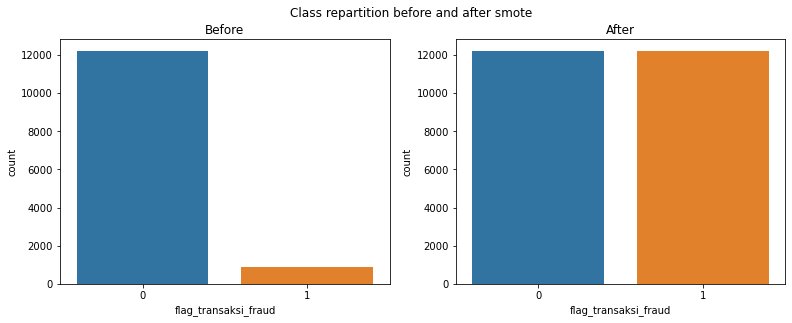

In [121]:
#visualizing smote results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="flag_transaksi_fraud", data=df, ax=axs[0])
sns.countplot(x="flag_transaksi_fraud", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after smote")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

print('Before SMOTE')
print('--------------------')
print('Normal Transactions \t: ', (Y.values == 0).sum())
print('Fraud Transactions \t: ', (Y.values == 1).sum())

print('\nAfter SMOTE')
print('--------------------')
print('Normal Transactions \t: ', (test.values == 0).sum())
print('Fraud Transactions \t: ', (test.values == 1).sum())

# BUILDING NN MODEL

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=1)

In [123]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [124]:
#train the model
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=24))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [125]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)#optimizer
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) #metrics

In [126]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto', baseline=None, restore_best_weights=False)

In [127]:
history = model.fit(X_train.values, y_train.values, epochs = 100, batch_size=128, validation_split = 0.20, verbose = 0, callbacks = [earlystopper])
history_dict = history.history

Epoch 00089: early stopping


Text(0.5, 0, 'Epochs')

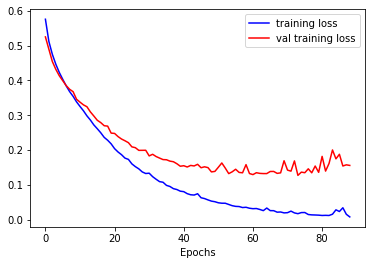

In [128]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

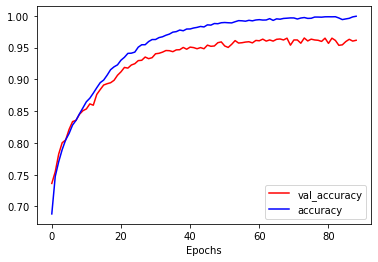

In [129]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

# RESULT AND ANALYSIS

In [130]:
#predictions
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

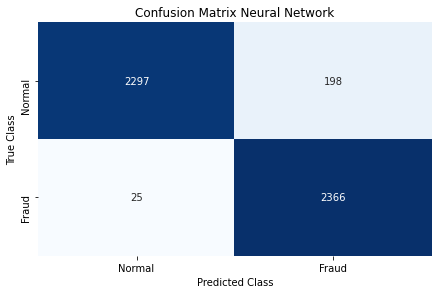

Normal predicted normal (TP)	: 2297
Normal predicted fraud (FN)	: 198
Fraud predicted normal (FP)	: 25
Fraud predicted fraud (TN)	: 2366


In [131]:
#CM matrix
matrix_nn = confusion_matrix(y_test, y_pred_nn)
cm_nn = pd.DataFrame(matrix_nn, index=['Normal', 'Fraud'], columns=['Normal', 'Fraud'])

sns.heatmap(cm_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Neural Network"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

tp, fn, fp, tn = matrix_nn.reshape(-1)
print('Normal predicted normal (TP)\t:', tp)
print('Normal predicted fraud (FN)\t:', fn)
print('Fraud predicted normal (FP)\t:', fp)
print('Fraud predicted fraud (TN)\t:', tn)

In [132]:
accuracy = ((tn+tp)/(tn+tp+fp+fn)) * 100
precission = (tp/(tp+fp)) * 100
recall = (tp/(tp+fn)) * 100
specificity = (tn/(tn+fp)) * 100
f1_score = 2 * (recall * precission) / (recall + precission)
error = 100 - accuracy

print('Performance result of model:')
print('----------------------------------')
print('Accuracy \t: {:.2f} %'. format(accuracy))
print('Precision \t: {:.2f} %'. format(precission))
print('Recall \t\t: {:.2f} %'. format(recall))
print('Specificity \t: {:.2f} %'. format(specificity))
print('F1 Score \t: {:.2f} %'. format(f1_score))
print('Error rate \t: {:.2f} %'. format(error))

Performance result of model:
----------------------------------
Accuracy 	: 95.44 %
Precision 	: 98.92 %
Recall 		: 92.06 %
Specificity 	: 98.95 %
F1 Score 	: 95.37 %
Error rate 	: 4.56 %


In [133]:
#AUC
y_pred_nn_proba = model.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: {:.2f}' . format(auc_keras * 100) + '%')

AUC Neural Net: 98.18%


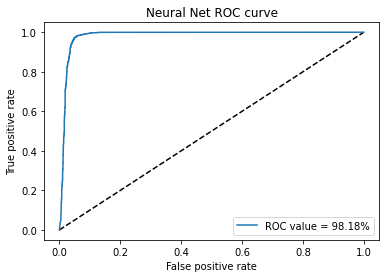

In [134]:
#ROC
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='ROC value = {:.2f}' . format(auc_keras * 100) + '%')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Neural Net ROC curve')
plt.legend(loc='best')
plt.show()

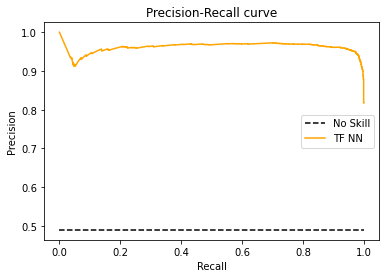

In [135]:
nn_precision, nn_recall, _ = precision_recall_curve(y_test, y_pred_nn_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(nn_recall, nn_precision, color='orange', label='TF NN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [136]:
# # save model and architecture to single file
# model.save("model 3.89.h5")
# print("Saved model to disk")